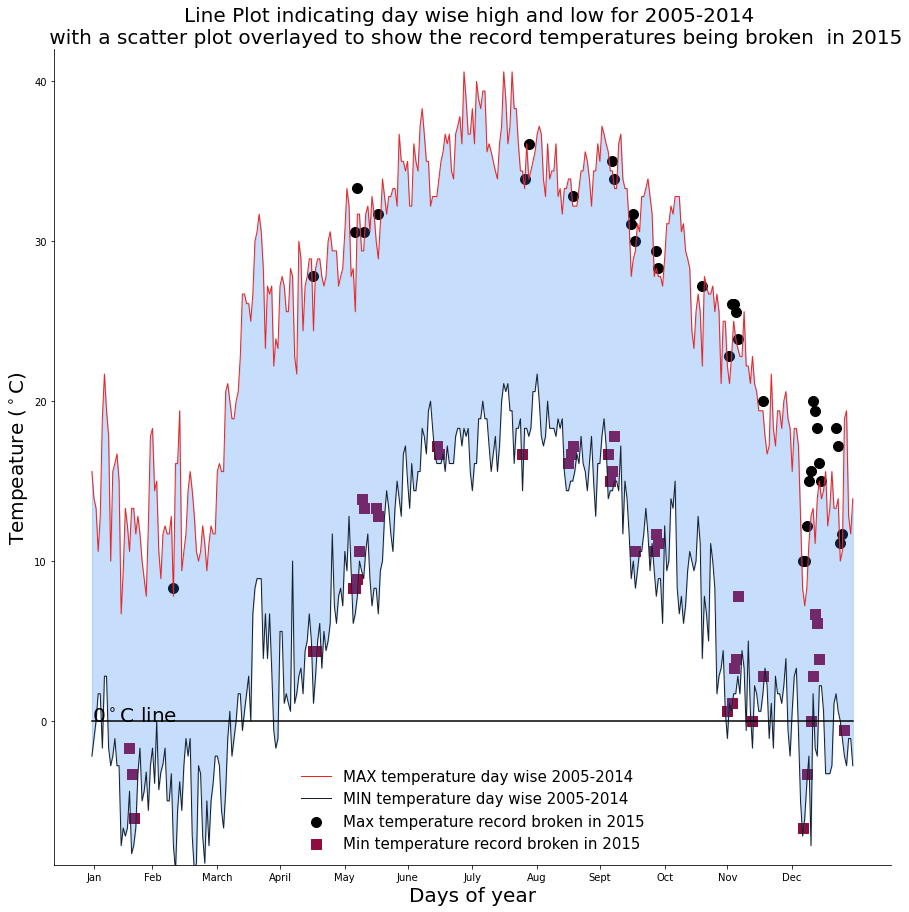

In [17]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore' )
df=pd.read_csv(r'data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv',usecols=['ID','Date','Element','Data_Value']) #read input file
df=df[~df['Date'].str.contains('02-29')] # removing leap year dates
df['Date']=pd.to_datetime(df['Date'])   #conversion to date time object
data=df[(df['Date'].dt.year>=2005) & (df['Date'].dt.year<=2014)] #date range 2005-2014
data['Data_Value']=data['Data_Value'].astype('float')/10 #conoverting 10th of celsius to normal temperatures

data_max=data[data['Element']=='TMAX']    #creating df for tmax values
data_min=data[data['Element']=='TMIN']    #creating df for tmin values
data_max.drop('Element',axis='columns',inplace=True)    
data_min.drop('Element',axis='columns',inplace=True)
data_max.rename(columns={'Data_Value':'Temperature'},inplace=True)
data_min.rename(columns={'Data_Value':'Temperature'},inplace=True)


temp_max=data_max.groupby('Date')['Temperature'].max()  #calculating max temperature daywise 
temp_min=data_min.groupby('Date')['Temperature'].min()  #calculating min temperature daywise
temp_max

max_arr=np.array([0]*365,dtype='float64')     	#creating an array that calculates max temp values day wise
for i in range(365):
    max_arr[i]=temp_max[i:(i+365)*9:365].max()
    #print(max_arr[i])
min_arr=np.array([0]*365,dtype='float64')		#creating an array that stores min temp values day wise for 2005-2014
for i in range(365):
    min_arr[i]=temp_min[i:(i+365)*9:365].max()
    #print(min_arr[i])
	
data15=df[df['Date'].dt.year==2015].sort_values(by='Date')                #creating df for 2015 year.
data15['Data_Value']=data15['Data_Value'].astype('float')/10
data15_max=data15[data15['Element']=='TMAX']
data15_min=data15[data15['Element']=='TMIN']
data15_max.drop('Element',axis='columns',inplace=True)
data15_min.drop('Element',axis='columns',inplace=True)
data15_max.rename(columns={'Data_Value':'Temperature'},inplace=True)
data15_min.rename(columns={'Data_Value':'Temperature'},inplace=True)

temp15_max=data15_max.groupby('Date')['Temperature'].max()
temp15_min=data15_min.groupby('Date')['Temperature'].min()


ind_max=(temp15_max.values>max_arr)					#storing the index where record was broken for max temp in 2015
ind_max=np.where(ind_max==True)
ind_min=(temp15_min.values>min_arr)					#storing the index where record was broken for min temp in 2015
ind_min=np.where(ind_min==True)
val_max=temp15_max[temp15_max>max_arr].values		#storing temp values where max temp record was broken in 2015
val_min=temp15_min[temp15_min>min_arr].values		#storing temp values where min temp record was broken in 2015


arr=np.array([1,28,31,30,31,30,31,31,30,31,30,31]).cumsum()		#creating tick labels locations for x-axis
months=['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']		#creating xtick labels

import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(15,15))
ax.plot(max_arr,label='MAX temperature day wise 2005-2014',color='#F0241E',linewidth=1)
ax.plot(min_arr,label='MIN temperature day wise 2005-2014',color='#17202A',linewidth=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.plot(temp_max.index,,color='black')
ax.annotate('0$^\circ$C line ',xy=(0,0.0000005),fontsize=20)
ax.scatter(ind_max,val_max,color='black',marker='o',s=100,label='Max temperature record broken in 2015')
ax.scatter(ind_min,val_min,color='#900C3F',marker='s',s=100,label='Min temperature record broken in 2015')
ax.plot(np.arange(0,365),[0]*365,color='black')
plt.legend(fontsize=15,frameon=False)

ax.fill_between(np.arange(0,365),min_arr,max_arr,alpha=0.25,color='#1E7CF0')
ax.set_ylabel('Tempeature ($^\circ$C)',fontsize=20)
ax.set_xlabel('Days of year',fontsize=20)
ax.set_xticks(arr)
ax.set_xticklabels(months)
title='Line Plot indicating day wise high and low for 2005-2014 \n with a scatter plot overlayed to show the record temperatures being broken  in 2015'
plt.title(title,fontsize=20)
plt.ylim([-9,42])
#fig.savefig('picture2.png')
plt.show()